# <font color='yellow' style='font-size: 30px;'>Roteiro para simular resposta ao impulso e entrada senoidal</font> <hr style='border: 2px solid yellow;'>

### Suponha um sistema cuja resposta ao impulso é dada a seguir:

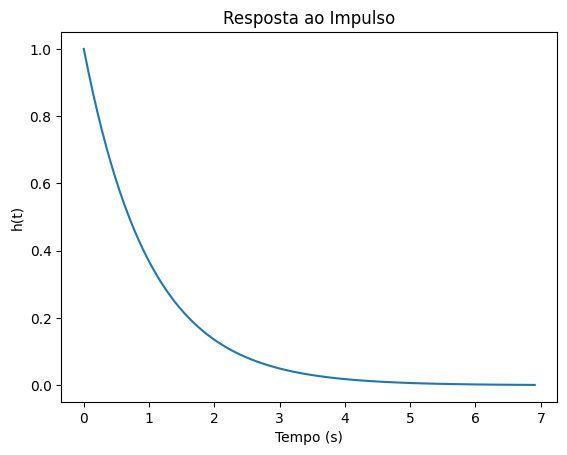

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from control import tf, impulse_response

# o sistema com resposta ao impulso h(t)=exp(-t)u(t) serah definido como
num = [1]
den = [1, 1]
sys = tf(num, den)

# resposta ao impulso do sistema
t, h = impulse_response(sys)

# plot da resposta ao impulso
fig, ax = plt.subplots()
ax.plot(t, h)
ax.set_xlabel('Tempo (s)')
ax.set_ylabel('h(t)')
ax.set_title('Resposta ao Impulso')
plt.show()


### Vamos verificar sua resposta à um sinal senoidal, como segue:

Razão de amplitude y(t)/x(t): 0.3151753165923738


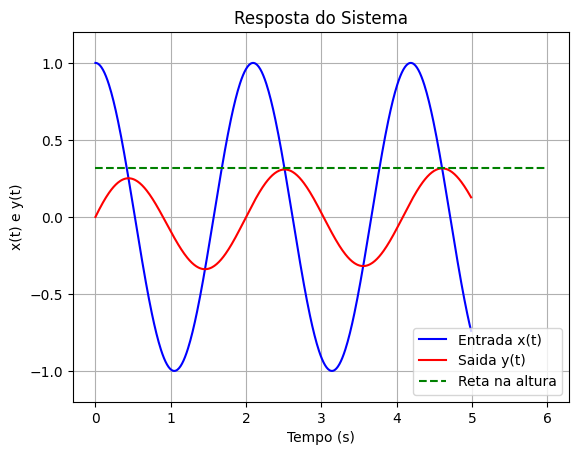

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from control import tf
from control.matlab import lsim

# entrada senoidal
t = np.arange(0, 6, 0.01)
w0 = 3
x = np.cos(w0*t)

# simulacao para entrada senoidal
num = [1]
den = [1, 1]
sys = tf(num, den)
y = lsim(sys, U=x, T=t)

# pontos máximos
y_max = np.argmax(y[0])
print(f"Razão de amplitude y(t)/x(t): {y[0][y_max]}")

# grafico dos primeiros instantes (regime transitorio)
fig, ax = plt.subplots()
ax.plot(t[:500], x[:500], 'b', label='Entrada x(t)')
ax.plot(t[:500], y[0][:500], 'r', label='Saida y(t)')
ax.set_xlabel('Tempo (s)')
ax.set_ylabel('x(t) e y(t)')
ax.set_title('Resposta do Sistema')
ax.set_ylim([-1.2, 1.2])

# pontos importantes
# ax.scatter(2, y[0][y_max], color='g', label='ponto')
ax.hlines(y[0][y_max], t[0], t[-1], color='g', linestyle='--', label='Reta na altura')

ax.legend()
plt.grid()
plt.show()


### Podemos ainda, supor um sistema discreto no tempo, como segue:

# <font color='yellow' style='font-size: 30px;'>Roteiro para analisar circuitos</font> <hr style='border: 2px solid yellow;'>

### <span style=color:white> Obtendo equações do sistema

A obtenção de equações de qualquer sistema passa pelo conhecimento prévio e teórico sobre a física em questão. Teoria de controle, na realidade, se aplica em qualquer engenharia. 

Como temos um forte interesse em utilizar eletrônica e computação para controle, convém abortar circuitos elétricos para entendimento dessas técnicas, mas aí está um fato curioso: em nenhum momento se espera que um engenheiro de controle e automação projete um circuito elétrico estável — e muito menos um sistema dinâmico estável.

#### Circuito RLC em série <hr style='line: 1px solid white;'>

<p style="text-align:center">
    <img src="./imagens/RCL_serie.png">
</p>

Deste circuito temos as duas seguintes equações — por Kirchoff de tensões:

\begin{equation}
\begin{cases}
L\frac{di}{dt} + \frac{R}{L} \frac{de_o}{dt} + \frac{1}{C} \int i \, dt = e_i  \\
\frac{1}{C} \int i \, dt = e_o
\end{cases}
\tag{1}
\end{equation}

Se levarmos para o domínio da frequência, sabendo que:

$ \boxed {A\frac{d}{dt} = As}$ 

$ \boxed {A \int i \, dt = \frac{1}{As}}$

Teremos:

\begin{equation}
\begin{cases}
LsI(s) + RI(s) + \frac{1}{Cs}I(s) = E_i(s)  \\
\frac{1}{Cs}I(s)  = E_o(s)
\end{cases}
\tag{2}
\end{equation}

Então, a função transferência se torna:

\begin{equation}
\frac{E_o(s)}{E_i(s)} = \frac{1}{LCs^2 + RCs + 1}
\tag{3}
\end{equation}

A função transferência já é um grande negócio. Ela indica como o circuito transfere informação entre a entrada e a saída. Aqui, já poderíamos iniciar uma simulação e verificar se faz sentido com o circuito em questão. 

Para obter o *'Espaço de Estados'* você precisará identificar a equação diferencial que governa o circuito. Uma maneira de fazer isso é isolar a derivada de maior grau da função transferência (*eq.3*), que é justamente $s^2$.

\begin{equation}
E_os^2 + E_o\frac{R}{Ls} + E_o\frac{1}{Lc} = E_i\frac{1}{LC} \iff \ddot{e}_o + \frac{R}{L}\dot{e}_o + \frac{1}{LC}e_o = \frac{1}{LC}e_i
\tag{4}
\end{equation}

#### **O que é o 'Espaço de Estados'?**

De saída, é uma forma de representar um sistema de ordem $n$ em um set de equações de $1º$ ordem. Só por isso, já temos toda a algebra linear disponível para nos ajudar a encontrar o estado do sistema em qualquer configuração de variáveis. Mas ainda podería dar outros motivos muito bons para tentarmos produzir essa representação matricial:

- Existem muitos métodos numéricos para resolver esse tipo de problema;
- Existem muitas técnicas de controle baseadas em Espaço de estado — justamente porque existem métodos numéricos poderosos;

Então, por exemplo: Filtros Kalman, LQR, Controle Robusto, MPC, etc. São todos métodos de controle baseados em Espaço de Estados. 

No caso de sistemas contínuos, lineares e invariantes no tempo (LTI) — se o seu sistema não cumprir esses requisitos, nada aqui tem valor para você — podemos dizer que o sistema consiste em 4 matrizes:

 - A: combinação linear de $\dot{x}(t)$ e ${x}(t)$, em outras palavras, determina como todos os estados internos estão relacionados;
 - B: determina como os inputs excitam o sistema, em outras palavras, quais estados internos são afetados pelos inputs;
 - C: representa como os estados precisam ser combinados para encontrar as saídas desejadas;
 - D: representa a operação crua ocorrendo em cada input;

Multiplicadas adequadamente por vetores 4 vetores:

 - $\dot{x}(t)$: vetor que representa a Dinâmica do sistema — determina como os estados vão mudar, portanto;
 - ${x}(t)$: vetor que representa o Estado do sistema — adequamente conhecido como "vetor de estados";
 - ${u}(t)$:
 - ${y}(t)$: vetor de saídas do sistema — é não só aquilo que você quer saber, mas manter controlado;

### <span style=color:white> Biblioteca 'Controls' para simulação

#### <span style=color:lightblue> **import**

In [ ]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib as plt
import control as ct

print('Versão do pandas -> %s' % pd.__version__)
print('Versão do numpy -> %s' % np.__version__)
print('Versão do scipy -> %s' % sp.__version__)
# print('Versão do matplotlib -> %s' % matplotlib.__version__)
print('Versão do control -> %s' % ct.__version__)

### <span style=color:white> Espaço de estados

In [ ]:
A = [[1, 2], [2, 1]]
B = [[1, 2], [2, 1]]
C = [[1, 2], [2, 1]]
D = [[1, 2], [2, 1]]

sys = ct.ss(A, B, C, D,)
sys